<a href="https://colab.research.google.com/github/cds-group-8/cds-group-8.github.io/blob/main/Copy_of_M8_NB_MiniProject_3_BitCoin_Forecasting_ARMA_Shruti_FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NPCI Upskilling - Data Science and Engineering Track

## A program by IIITH and TalentSprint

### Playground Challenge 4: BitCoin_Forecasting_ARMA [20 points]


### ARMA Model [2 point]

* Train the ARMA model on timeseries data and print AIC value

### ARMA Model [2 point]

* Train the ARMA model on timeseries data and print AIC value

##<b><font color="red">Please run this solution notebook on your Google Colab T4 GPU runtime</font></b>

To select the T4 GPU, follow these steps:

Runtime >> Change runtime type >> T4 GPU >> save

## Learning Objectives

At the end of the experiment, you will be able to :

* perform EDA on time series data
* analyze the auto correlation and partial auto correlation plots
* implement the ARMA model and forecast the bit coin price

## Dataset



Bitcoin is a digital currency created in January 2009. It follows the ideas set out in a whitepaper by the mysterious and pseudonymous Satoshi Nakamoto. The identity of the person or persons who created the technology is still a mystery. Bitcoin offers the promise of lower transaction fees than traditional online payment mechanisms and, unlike government-issued currencies, it is operated by a decentralized authority.

Data Description
This dataset provides the history of daily prices of Bitcoin. The data starts from 17-Sep-2014 and is updated till 09-July-2021. All the column descriptions are provided below.

* Date: Day/Month/Year
* Open: Price from the first transaction of a trading day
* High: Maximum price in a trading day
* Low: Minimum price in a trading day
* Close: Price from the last transaction of a trading day
* Adj Close: Closing price adjusted to reflect the value after accounting for any corporate actions
* Volume: Number of units traded in a day

## Problem Statement

Perform EDA and forecast the Bitcoin price using ARMA model on timeseries (bitcoin) data.

## Grading = 20 Points

In [ ]:
#@title Download Dataset
!wget -qq !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/BTC.csv
print("Dataset downloaded successfully!!")

Dataset downloaded successfully!!


### Import required Packages

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import itertools

### Load the data and perform EDA [4 points]

Hint: Refer to this ['Bitcoin dataset EDA'](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module6/M6_SNB_MiniProject_3_BitCoin_Forecasting_ARMA_Exploratory%20Data%20Analysis.pdf)

In [ ]:
# YOUR CODE HERE
df= pd.read_csv('BTC.csv')
print(df.head())
print(df.shape)


         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

       Volume  
0  21056800.0  
1  34483200.0  
2  37919700.0  
3  36863600.0  
4  26580100.0  
(2520, 7)


In [ ]:
print(df.isnull().sum())

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


In [ ]:
print(df[df.isnull().any(axis=1)])

            Date  Open  High  Low  Close  Adj Close  Volume
2039  2020-04-17   NaN   NaN  NaN    NaN        NaN     NaN
2214  2020-10-09   NaN   NaN  NaN    NaN        NaN     NaN
2217  2020-10-12   NaN   NaN  NaN    NaN        NaN     NaN
2218  2020-10-13   NaN   NaN  NaN    NaN        NaN     NaN


In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
(2516, 7)


In [ ]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

print("\nPotential Outliers based on IQR:")
display(outliers)

Q1 (25th percentile): 569.75875825
Q3 (75th percentile): 9393.4086915
IQR (Interquartile Range): 8823.64993325
Lower Bound for Outliers: -12665.716141625
Upper Bound for Outliers: 22628.883591375

Potential Outliers based on IQR:


,Date,Open,High,Low,Close,Adj Close,Volume
2283,2020-12-17,21308.351563,23642.660156,21234.675781,22805.162109,22805.162109,7.137861e+10
2284,2020-12-18,22806.796875,23238.601563,22399.812500,23137.960938,23137.960938,4.038790e+10
2285,2020-12-19,23132.865234,24085.855469,22826.472656,23869.832031,23869.832031,3.848755e+10
2286,2020-12-20,23861.765625,24209.660156,23147.710938,23477.294922,23477.294922,3.784423e+10
2287,2020-12-21,23474.455078,24059.982422,22159.367188,22803.082031,22803.082031,4.585271e+10
...,...,...,...,...,...,...,...
2515,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,3.822648e+10
2516,2021-08-07,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,4.003086e+10
2517,2021-08-08,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10
2518,2021-08-09,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,3.873408e+10


#### Analyze the correlation (heatmap) of all the features

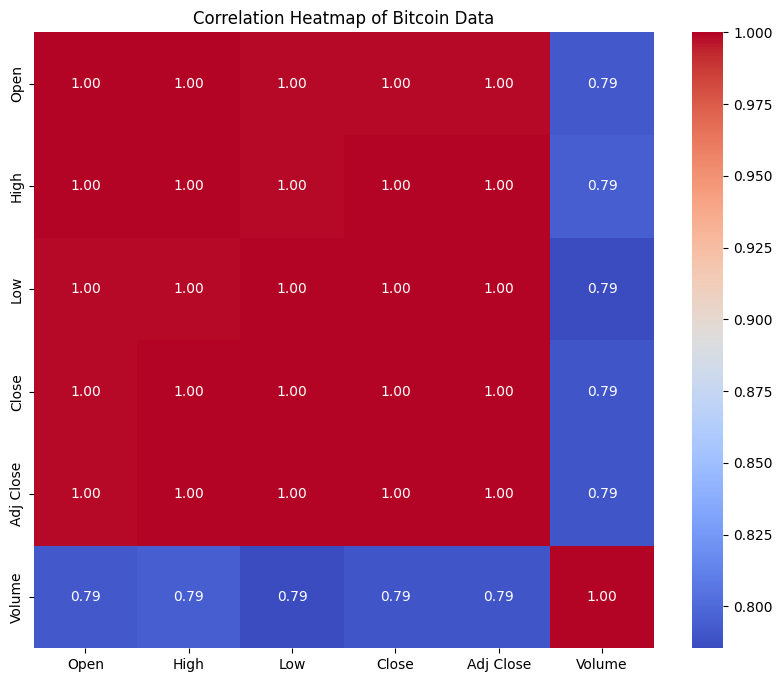

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Date', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Bitcoin Data')
plt.show()

### Test the Stationarity using Augmented Dicky Fuller Test [2 point]

The Augmented Dicky Fuller test is a type of statistical test called a unit root test.

Hint: [tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

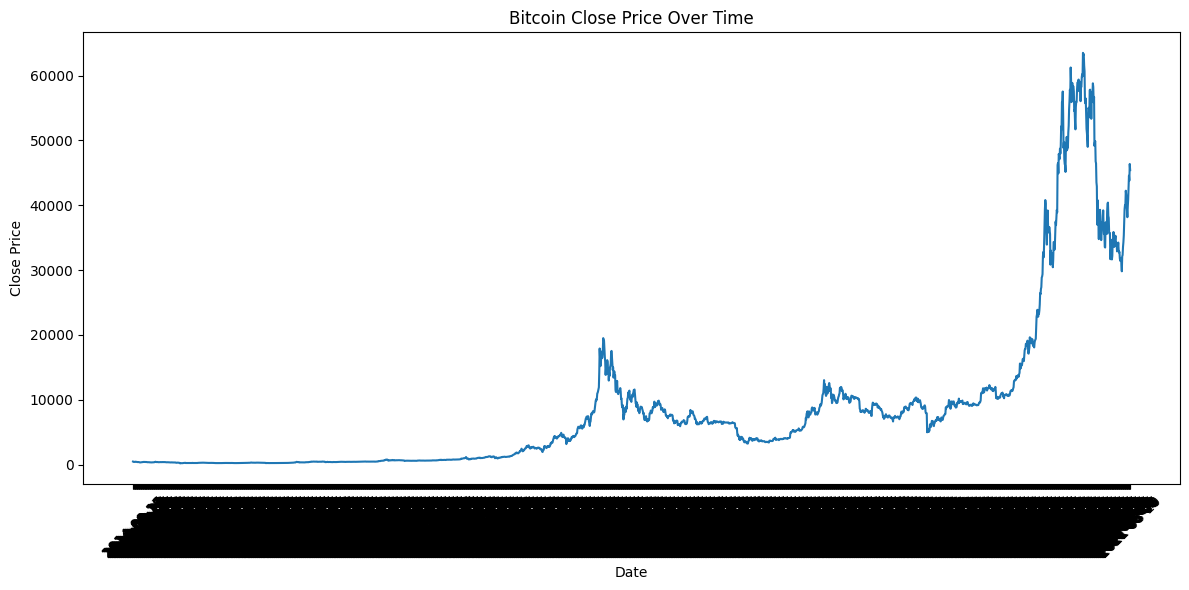

In [9]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Perform the Augmented Dickey-Fuller test on the original 'Close' price
result = adfuller(df['Close'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("\nResult: The time series is likely stationary (reject the null hypothesis).")
else:
    print("\nResult: The time series is likely non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -0.038593
p-value: 0.955222
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

Result: The time series is likely non-stationary (fail to reject the null hypothesis).


### Identify the trends and seasonality from the given time series data [4 points]

* Apply seasonal decompose and plot the results
* Check the stationarity of data using rolling mean and rolling standard deviation.
* Make the time series data stationary
  * Apply a log transformation to reduce the variance of the series
  * Eliminate the Trend and Seasonality by Differencing

**Note:** Ensure timeseries without NaN, inf, -inf values, Replace with 0 if found.

Read more about stationarity of a timeseries in the following [link](https://machinelearningmastery.com/time-series-data-stationary-python/)

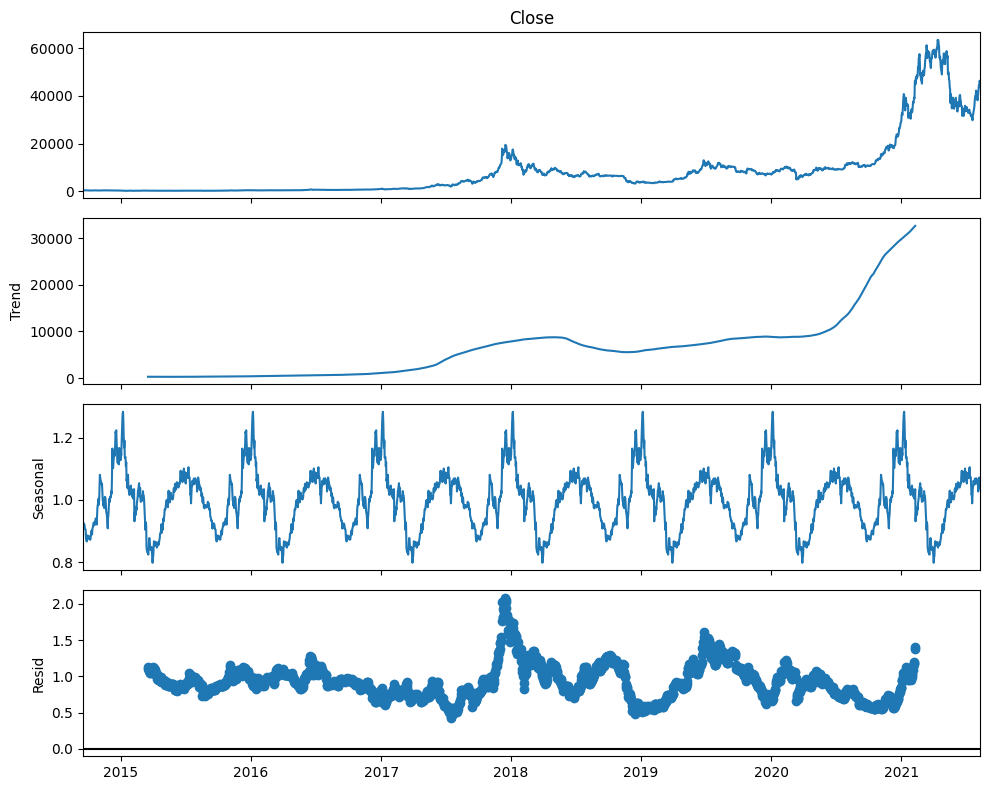

In [17]:
# YOUR CODE HERE

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365) # Assuming daily data and annual seasonality

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

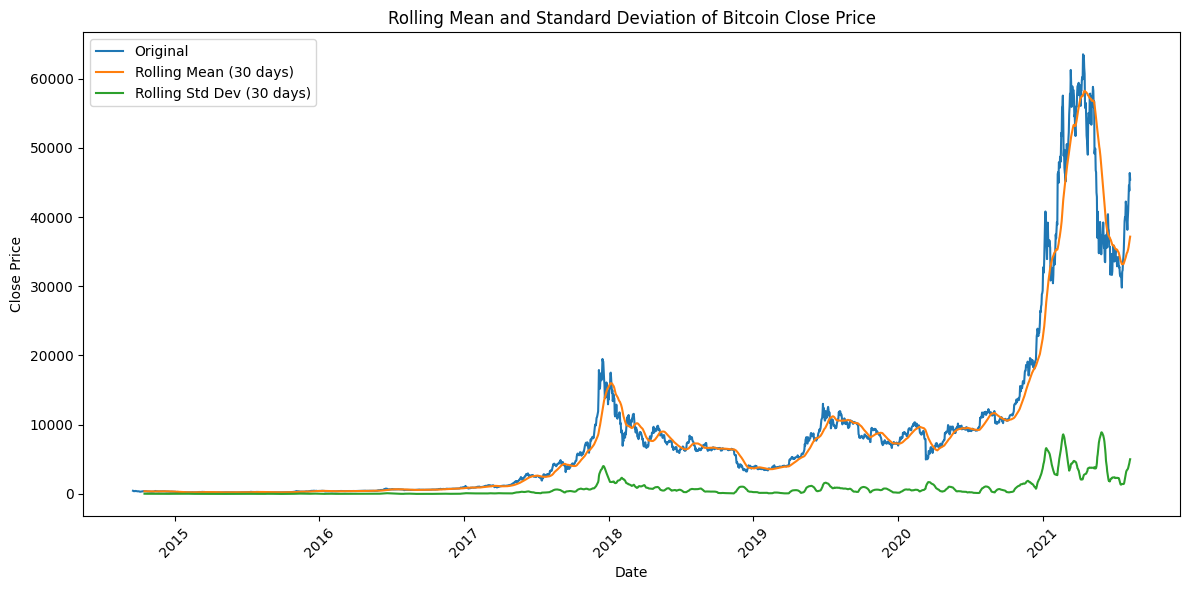

In [18]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = df['Close'].rolling(window=30).mean() # Using a window of 30 days
rolling_std = df['Close'].rolling(window=30).std()

# Plot the original series, rolling mean, and rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (30 days)')
plt.plot(rolling_std, label='Rolling Std Dev (30 days)')
plt.title('Rolling Mean and Standard Deviation of Bitcoin Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Open,High,Low,Close,Adj Close,Volume,Close_log,Close_diff
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,6.125414,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,6.050771,-0.074643
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,5.978369,-0.072402
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,6.013480,0.035111
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,5.988513,-0.024968


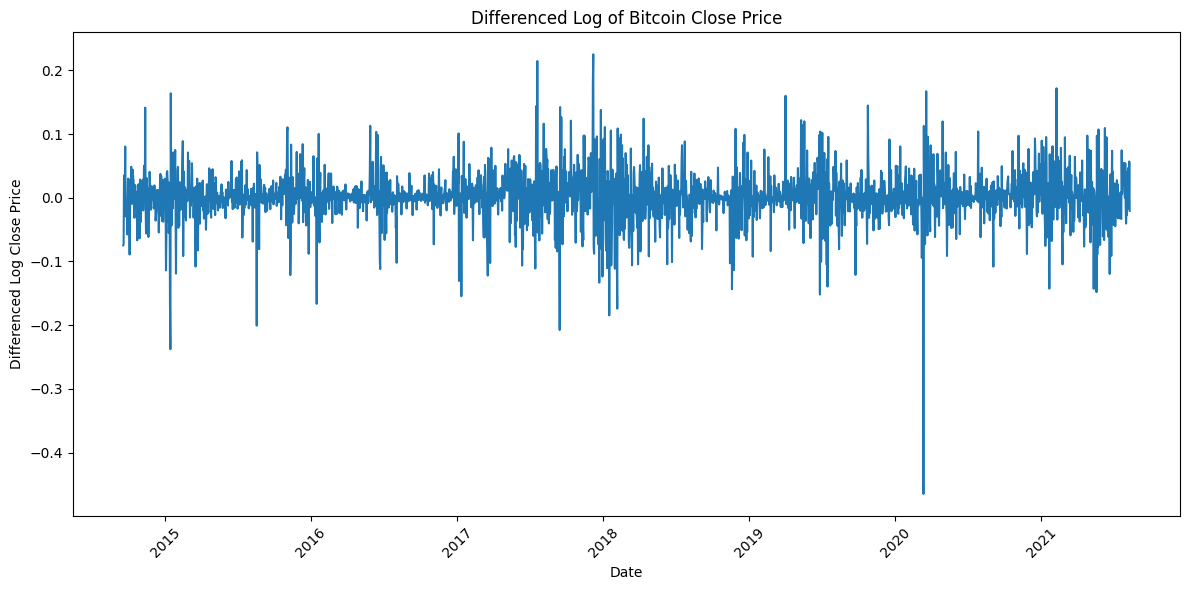

In [19]:
# Apply log transformation
df['Close_log'] = np.log(df['Close'])

# Eliminate Trend and Seasonality by Differencing
df['Close_diff'] = df['Close_log'].diff().dropna()

# Display the first few rows of the transformed data
display(df.head())

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'])
plt.title('Differenced Log of Bitcoin Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Log Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Test the Stationarity using Augmented Dicky Fuller Test [2 point]

Verify the stationarity post differencing, using ADF

Hint: [tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

In [20]:
# YOUR CODE HERE
# Perform the Augmented Dickey-Fuller test on the differenced log-transformed 'Close' price
result_diff = adfuller(df['Close_diff'].dropna()) # Use .dropna() to handle the NaN in the first row

# Print the results
print('ADF Statistic (Differenced Series): %f' % result_diff[0])
print('p-value (Differenced Series): %f' % result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic (Differenced Series): -15.051797
p-value (Differenced Series): 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


### Auto Correlation Plot [2 point]

Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data.  The concept of autocorrelation is most often discussed in the context of time series data in which observations occur at different points in time.

* Plot the auto correlation function (ACF and PACF)
* Analyse ACF and PACF plots and define AR (p) and MA(q) terms

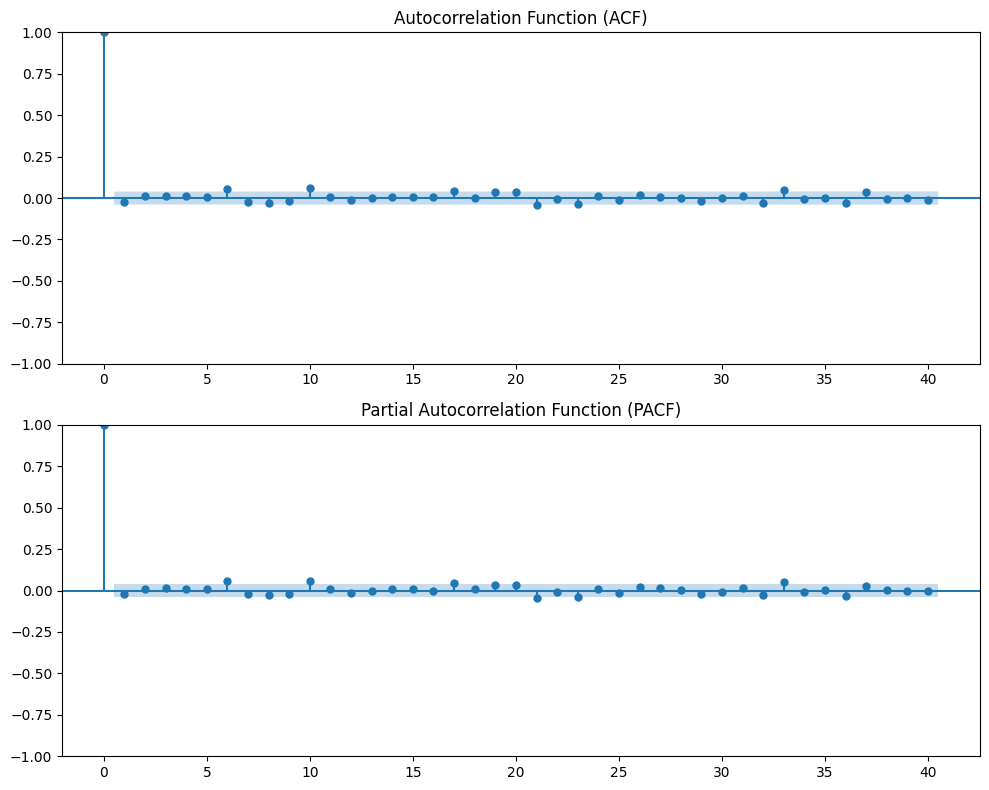

In [21]:
# YOUR CODE HERE
# Plot ACF and PACF of the differenced series
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df['Close_diff'].dropna(), ax=axes[0], lags=40) # Plot ACF
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df['Close_diff'].dropna(), ax=axes[1], lags=40) # Plot PACF
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

### Train the Auto Regressive model [2 point]

Hint: sm.tsa.AR()

In [24]:
# YOUR CODE HERE
# Train the Auto Regressive model
# We need to choose an order (p) for the AR model based on the PACF plot.
# Let's start with a small value for demonstration, e.g., p=1.
# You might want to experiment with different p values based on your PACF analysis.

from statsmodels.tsa.ar_model import AutoReg

# Fit the AR model
# Using the differenced log-transformed data
model_ar = AutoReg(df['Close_diff'].dropna(), lags=1) # Example: AR(1)
model_ar_fit = model_ar.fit()

# Print the model summary
print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:             Close_diff   No. Observations:                 2515
Model:                     AutoReg(1)   Log Likelihood                4554.997
Method:               Conditional MLE   S.D. of innovations              0.040
Date:                Sun, 20 Jul 2025   AIC                          -9103.994
Time:                        09:10:39   BIC                          -9086.505
Sample:                             1   HQIC                         -9097.647
                                 2515                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0019      0.001      2.409      0.016       0.000       0.003
Close_diff.L1    -0.0229      0.020     -1.151      0.250      -0.062       0.016
                                    Root

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### ARMA Model [2 point]

* Train the ARMA model on timeseries data and print AIC value

In [30]:
# Train the ARMA model
# Using the differenced log-transformed data
# We will start with ARMA(1,1) as an example.
# You may need to iterate and try different (p, q) combinations
# based on ACF/PACF analysis and AIC values to find the best model.

# Define the order (p, q) for the ARMA model
# Based on ACF/PACF, you might choose different values.
p = 1
q = 1

# Import the newer ARIMA model class
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARMA model using the ARIMA class with differencing order d=0
# Use the differenced log-transformed data and the chosen order (p, 0, q)
model_arma = ARIMA(df['Close_diff'].dropna(), order=(p, 0, q))
model_arma_fit = model_arma.fit()

# Print the model summary, which includes the AIC value
print(model_arma_fit.summary())

# You can also access the AIC value directly
print(f"ARMA({p},{q}) AIC: {model_arma_fit.aic}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 2515
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4555.485
Date:                Sun, 20 Jul 2025   AIC                          -9102.970
Time:                        09:26:59   BIC                          -9079.650
Sample:                             0   HQIC                         -9094.507
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.001      2.285      0.022       0.000       0.003
ar.L1         -0.1779      0.651     -0.273      0.785      -1.455       1.099
ma.L1          0.1542      0.652      0.236      0.8

In [28]:
# Train an ARIMA(2,0,0) model (AR(2) on differenced data)
p = 2
q = 0

from statsmodels.tsa.arima.model import ARIMA

model_arima_200 = ARIMA(df['Close_diff'].dropna(), order=(p, 0, q))
model_arima_200_fit = model_arima_200.fit()

print(f"ARIMA({p}, 0, {q}) Model Summary:")
print(model_arima_200_fit.summary())
print(f"ARIMA({p}, 0, {q}) AIC: {model_arima_200_fit.aic}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) Model Summary:
                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 2515
Model:                 ARIMA(2, 0, 0)   Log Likelihood                4555.539
Date:                Sun, 20 Jul 2025   AIC                          -9103.078
Time:                        09:23:58   BIC                          -9079.758
Sample:                             0   HQIC                         -9094.614
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.001      2.275      0.023       0.000       0.003
ar.L1         -0.0242      0.013     -1.915      0.055      -0.049       0.001
ar.L2          0.0091 

In [32]:
# Train an ARIMA(0,0,2) model (MA(2) on differenced data)
p = 0
q = 2

from statsmodels.tsa.arima.model import ARIMA

model_arima_002 = ARIMA(df['Close_diff'].dropna(), order=(p, 0, q))
model_arima_002_fit = model_arima_002.fit()

print(f"ARIMA({p}, 0, {q}) Model Summary:")
print(model_arima_002_fit.summary())
print(f"ARIMA({p}, 0, {q}) AIC: {model_arima_200_fit.aic}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) Model Summary:
                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 2515
Model:                 ARIMA(0, 0, 2)   Log Likelihood                4555.554
Date:                Sun, 20 Jul 2025   AIC                          -9103.108
Time:                        09:36:57   BIC                          -9079.788
Sample:                             0   HQIC                         -9094.644
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.001      2.273      0.023       0.000       0.003
ma.L1         -0.0239      0.013     -1.888      0.059      -0.049       0.001
ma.L2          0.0097 

#### Plot the predictions for timeseries data [2 point]

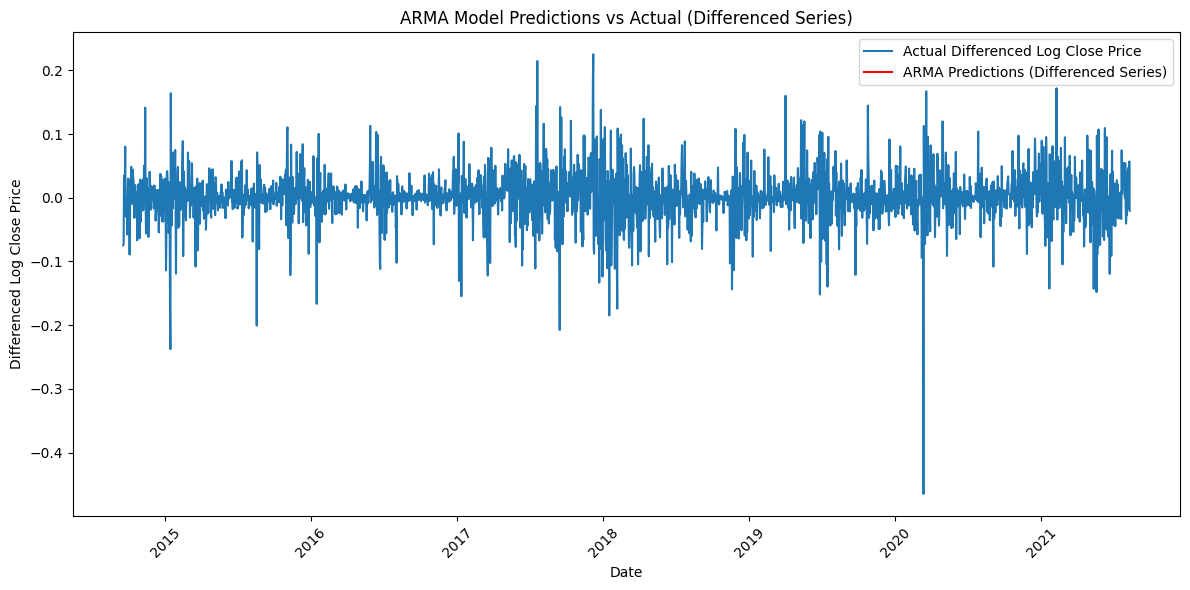

In [33]:
# YOUR CODE HERE
# Plot the predictions for the time series data

# Use the fitted ARIMA(0,0,2) model (or change to your preferred fitted model)
# model_to_plot = model_arma_fit # If you want to plot ARMA(1,1) from cell 96e0aa90
# model_to_plot = model_arima_200_fit # If you want to plot ARIMA(2,0,0) from cell h3yosn_SJZ5u
model_to_plot = model_ar_fit # Using ARIMA(0,0,2) from cell h5q5H5aTJfCX

# Get the in-sample predictions
# The predictions will be for the differenced log-transformed series
predictions_diff = model_to_plot.predict(start=0, end=len(df['Close_diff'].dropna())-1)

# The index of predictions should match the index of the differenced data
predictions_diff.index = df['Close_diff'].dropna().index

# Plot the actual differenced log-transformed series and the predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'].dropna(), label='Actual Differenced Log Close Price')
plt.plot(predictions_diff, color='red', label='ARMA Predictions (Differenced Series)')
plt.title('ARMA Model Predictions vs Actual (Differenced Series)')
plt.xlabel('Date')
plt.ylabel('Differenced Log Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Report Analysis

* Discuss how sudden effects of bitcoin price affects the model parameters
* State your observations about the trend and seasonality of the timeseries data
* Discuss how you selected ARMA (p and q) terms.
* Interpret the AIC value obtained for the ARMA model